<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/17_Image_Face_Landmark_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 17. Arc detektálás

A dlib könyvtár segítségével fogom megekersni egy arcon a kulcspontokat.

A bemutató még kiegészítés alatt áll.

In [ ]:
!wget https://github.com/JoDeMiro/OpenCVTutorial/raw/main/woman2.jpg

--2021-06-10 17:05:19--  https://github.com/JoDeMiro/OpenCVTutorial/raw/main/woman2.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoDeMiro/OpenCVTutorial/main/woman2.jpg [following]
--2021-06-10 17:05:19--  https://raw.githubusercontent.com/JoDeMiro/OpenCVTutorial/main/woman2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 778477 (760K) [image/jpeg]
Saving to: ‘woman2.jpg’

woman2.jpg          100%[===================>] 760.23K  --.-KB/s    in 0.05s   

2021-06-10 17:05:20 (14.9 MB/s) - ‘woman2.jpg’ saved [778477/778477]



In [ ]:
%%capture
!wget https://github.com/JoDeMiro/ImageProcessing/raw/main/images/woman3.jpg


In [ ]:
!wget https://github.com/Practical-CV/Facial-Landmarks-Detection-with-DLIB/raw/master/shape_predictor_68_face_landmarks.dat

--2021-06-10 17:09:22--  https://github.com/Practical-CV/Facial-Landmarks-Detection-with-DLIB/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Practical-CV/Facial-Landmarks-Detection-with-DLIB/master/shape_predictor_68_face_landmarks.dat [following]
--2021-06-10 17:09:23--  https://raw.githubusercontent.com/Practical-CV/Facial-Landmarks-Detection-with-DLIB/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_pr

In [ ]:

import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt

from imutils import face_utils
from google.colab.patches import cv2_imshow


In [ ]:
picture = 'woman2.jpg'
picture = 'woman3.jpg'

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


In [ ]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(picture)
image = imutils.resize(image, width=500)
rgb   = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

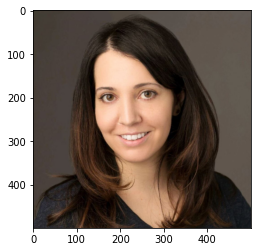

In [ ]:
plt.imshow(rgb)

In [ ]:
# detect faces in the grayscale image
rects = detector(gray, 1)

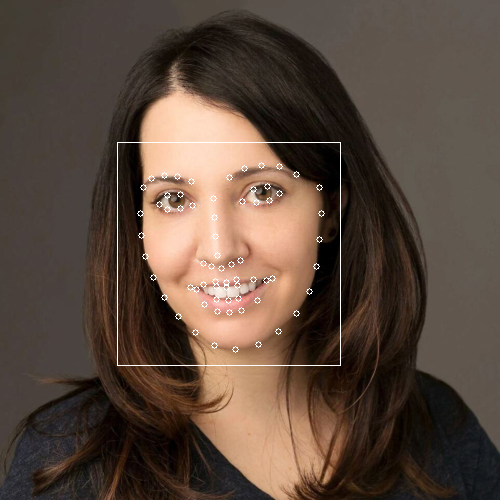

In [ ]:

# loop over the face detections
for (i, rect) in enumerate(rects):
	# keresse meg a kulcspontokat az arcon
	# és alakítsa át (x, y) kordináta rendszrbe a megjelenítéshez
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# konvertálja át a dlib téglalapot OpenCV stílusú alakzattá
	# [a formátum, (x, y, w, h)] amit az OpenCV vár
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 1)

	# Jelölje meg szöveggel a felismert arcot
	# cv2.putText(image, "Arc #{}".format(i + 1), (x - 10, y - 10),
  #  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 3, (255, 255, 255), 1)


# show the output image with the face detections + facial landmarks
# cv2.imshow("Output", image)
cv2_imshow(image)